# 面積と標準偏差

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

figsize = (10, 5)
path = '../../data/processed/df_filtered.xlsx'

In [3]:
df = pd.read_excel(path)

In [ ]:
df['distance_m']

In [66]:
std = df.groupby('island_ids')['log_pop_star'].std()
area = df.groupby('island_ids')['area_km2'].mean()
dist = df.groupby('island_ids')['distance_m'].mean()

In [74]:
y, X = dmatrices('std ~ area + I(area**2)')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
y_pred = result.predict(X)

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.009
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.140
Time:                        10:26:09   Log-Likelihood:                 49.450
No. Observations:                  94   AIC:                            -92.90
Df Residuals:                      91   BIC:                            -85.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1713      0.018      9.485   

Text(0, 0.5, 'std')

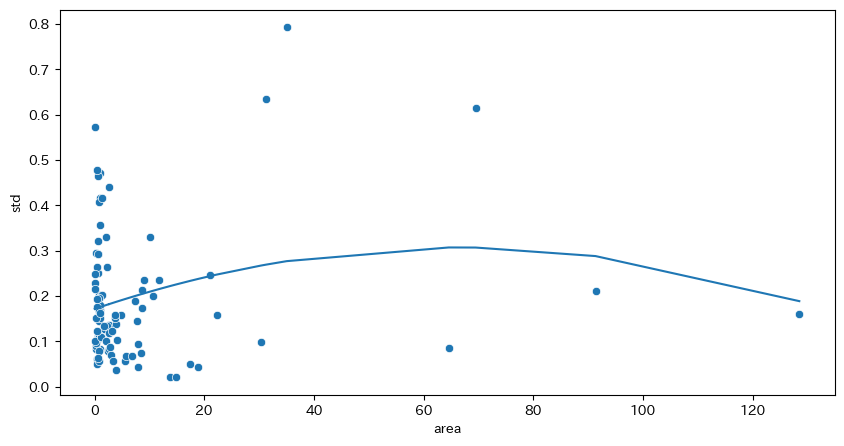

In [75]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x=area, y=std, data=df, ax=ax)
sns.lineplot(x=area, y=y_pred, ax=ax)
ax.set_xlabel('area')
ax.set_ylabel('std')